In [ ]:
!pip install -q kaggle


In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.04G/1.06G [00:06<00:00, 147MB/s]
100% 1.06G/1.06G [00:07<00:00, 163MB/s]


In [ ]:
import zipfile
zip_ref =zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


**These images stored are in numpy array,the problem being every values in numpy ranges[0,255],which has to be normalized.**

In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

we create a CNN model now,with 3 convolution layers
1. 32 filters
2. 64 filters
3. 128 filters

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 73s 100ms/step - loss: 1.4412 - accuracy: 0.5885 - val_loss: 0.6434 - val_accuracy: 0.6408
Epoch 2/10
625/625 [==============================] - 64s 102ms/step - loss: 0.5798 - accuracy: 0.7013 - val_loss: 0.5470 - val_accuracy: 0.7306
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4976 - accuracy: 0.7637 - val_loss: 0.5026 - val_accuracy: 0.7518
Epoch 4/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4267 - accuracy: 0.8059 - val_loss: 1.3767 - val_accuracy: 0.5958
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3768 - accuracy: 0.8330 - val_loss: 0.5090 - val_accuracy: 0.7412
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2947 - accuracy: 0.8730 - val_loss: 0.4282 - val_accuracy: 0.8168
Epoch 7/10
625/625 [==============================] - 66s 106ms/step - loss: 0.2221 - accuracy: 0.9086 - val_loss: 0.4425 - val_ac

*checking training using plots**

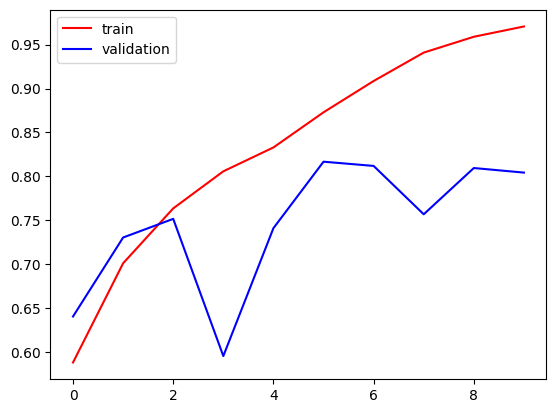

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

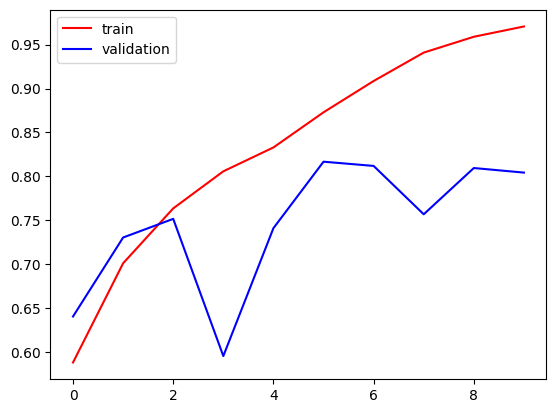

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

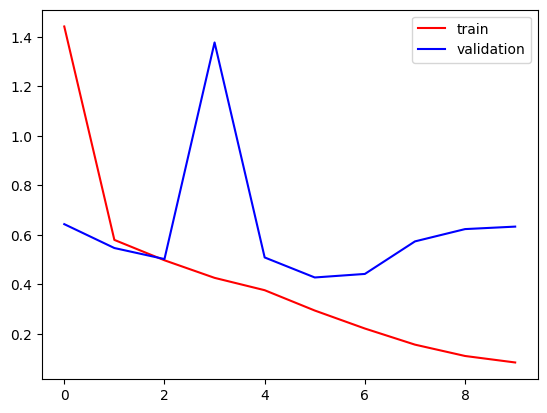

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

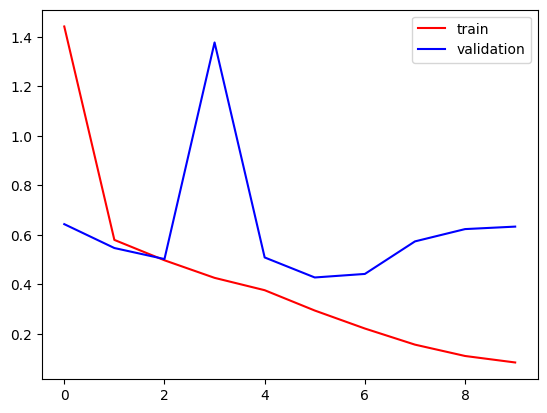

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

**The gap between training and validation loss is increasing as the epochs increases**


indicating the case of overfitting(the model give a fair result of training data while noe the same case with testing data

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [ ]:
import cv2

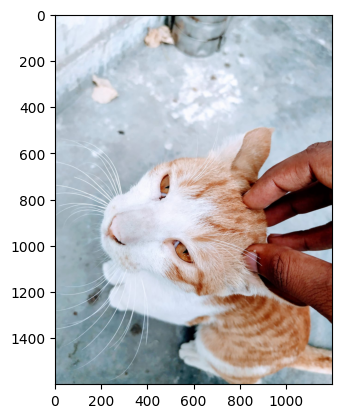

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image using OpenCV
img_array = cv2.imread('/content/cat2.jpeg')

# Display the image using Matplotlib
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)) # Convert from BGR (OpenCV default) to RGB (Matplotlib expects)
plt.show()

In [ ]:
img_array.shape

(1600, 1200, 3)

In [ ]:
img_array = cv2.resize(img_array,(256,256))

In [ ]:
test_input = img_array.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 27ms/step


array([[0.]], dtype=float32)

In [ ]:
#which is for cat